# Exploratory Data Analysis III
#### This kernel is to investigate shops and items

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
PATH_TO_DATA = 'data/predict_future_sales'
items = pd.read_csv(os.path.join(PATH_TO_DATA, 'items.csv'))
item_categories = pd.read_csv(os.path.join(PATH_TO_DATA, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(PATH_TO_DATA, 'shops.csv'))
test = pd.read_csv(os.path.join(PATH_TO_DATA, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(PATH_TO_DATA, 'sample_submission.csv'))
sales_train = pd.read_pickle('data/sales_train_dwncast.pkl')

In [3]:
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
test.tail()

,ID,shop_id,item_id
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
214199,214199,45,969


In [6]:
sample_submission.tail()

,ID,item_cnt_month
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5
214199,214199,0.5


### To explore the items sold in shop over a period of time, lets convert the date to pandas datetime format

In [7]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format="%d.%m.%Y")
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,2015-10-10,33,25,7409,299.0,1.0
2935845,2015-10-09,33,25,7460,299.0,1.0
2935846,2015-10-14,33,25,7459,349.0,1.0
2935847,2015-10-22,33,25,7440,299.0,1.0
2935848,2015-10-03,33,25,7460,299.0,1.0


#### Sum of items count per month

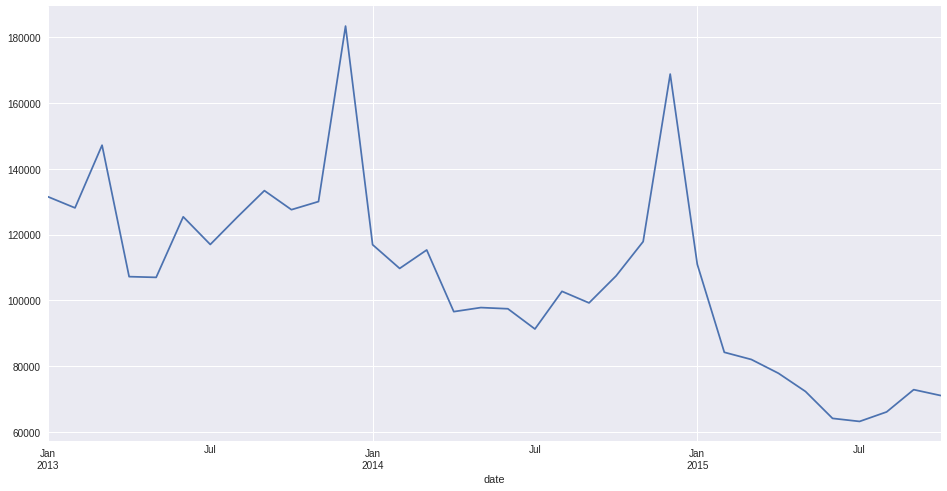

In [8]:
# monthly sampling distribution on the train data
plt.style.use('seaborn')
plt.figure(figsize=(16, 8))
sales_train.copy().set_index('date').item_cnt_day.resample('M').sum().plot()

In [9]:
s_train = pd.DataFrame(sales_train.copy().set_index('date').item_cnt_day.resample('M').sum())
s_train[s_train['item_cnt_day']>160000]

,item_cnt_day
date,
2013-12-31,183342.0
2014-12-31,168755.0


Text(0, 0.5, 'Frequency')

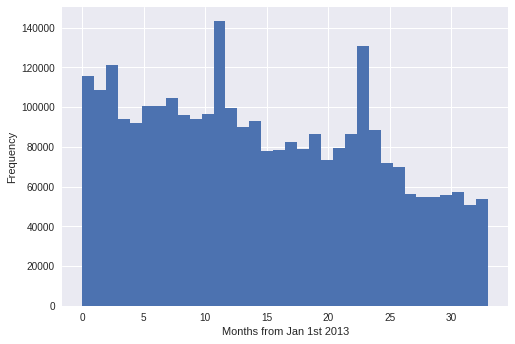

In [11]:
plt.hist(sales_train['date_block_num'],bins=34)
plt.xlabel('Months from Jan 1st 2013')
plt.ylabel('Frequency')

#### Mean of items count per month

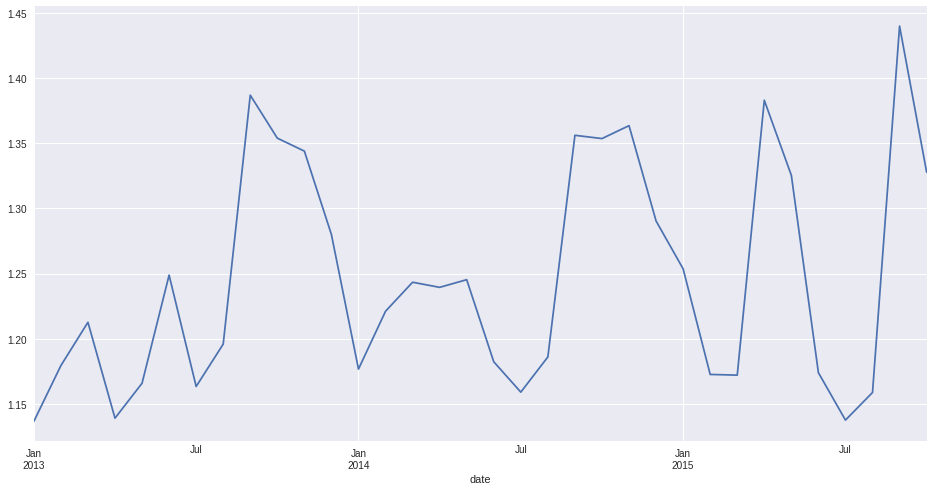

In [46]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 8))
sales_train.copy().set_index('date').item_cnt_day.resample('M').mean().plot()

### Sales Observation
There is an sharp increase in the number of items sold in December(both 2013 and 2014), this is the holiday period.
But there is a negative trend, i.e. general decrease in sales (even in the holiday period)

### Explore Item_prices on the shop

CPU times: user 19.9 s, sys: 524 ms, total: 20.4 s
Wall time: 20.4 s


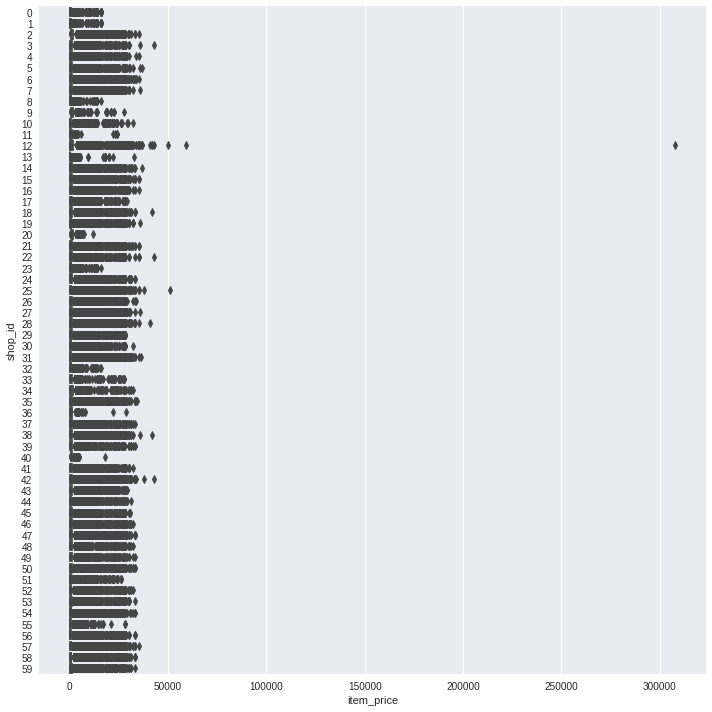

In [25]:
%%time
_ = sns.catplot(x='item_price' ,y='shop_id',kind = 'box', orient='h',data=sales_train , height=10)
_.set_axis_labels("item_price", "shop_id")
#_.set(xlim=(0, 70000))

In [26]:
#The most expensive item
print(sales_train["item_price"].max())
sales_train[sales_train["item_price"] > 300000]

307980.0


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


In [28]:
items[items['item_id'] == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [31]:
#checking for items which is similar to Radmin
items[items["item_name"].apply(lambda x: "radmin" in x.lower().split() )]

,item_name,item_id,item_category_id
6065,Radmin 3 - 1 лиц.,6065,75
6066,Radmin 3 - 522 лиц.,6066,75


In [ ]:
#translation = Radmin 3 - 522 persons

In [30]:
shops[shops['shop_id'] == 12]

,shop_name,shop_id
12,Интернет-магазин ЧС,12


In [33]:
sales_train[sales_train["item_id"] == 6065].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
291238,2013-03-21,2,22,6065,1299.0,1.0
291260,2013-03-22,2,22,6065,1299.0,1.0
318708,2013-03-11,2,25,6065,1299.0,1.0
370177,2013-04-18,3,12,6065,1299.0,1.0
375067,2013-04-06,3,6,6065,1299.0,1.0


In [34]:
sales_train[sales_train["item_id"] == 6066].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


In [40]:
sales_train[sales_train.item_id==6065]["item_cnt_day"].sum()

39.0

In [43]:
307980.0/522

590.0

#### Looks like this software was sold to individuals as well as for organisations
#### They were sold to 39 individuals
#### As a package it costed 590 per user, where as individually it costed 1299. 

In [49]:
#Getting the range of the date block num in the training data set
sales_train['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])